**Importing packages and libraries**

In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
import tensorflow as tf
import pandas as pd


**Preprocessing test dataset**

In [ ]:
base_dir = "D:/Land use recognition/data"
batch_size = 30
test_datagen = ImageDataGenerator(rescale=1./227,
                                   shear_range=0,
                                   zoom_range=0,
                                   width_shift_range=0,
                                   height_shift_range=0,
                                   fill_mode='nearest')

test_set = test_datagen.flow_from_directory(base_dir+'/test',
                                            target_size=(64, 64),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 900 images belonging to 20 classes.


**Loading the model**

In [ ]:
from keras.models import load_model
model_path = "D:/Land use recognition/LandUseModelFinaltransfer.h5"
model = load_model(model_path)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 16, 16, 256)      

In [ ]:
testdir='D:/Land use recognition/data/test/'
types=[]
fol=[]
fil=[]
fol = os.listdir(testdir)
types = os.listdir(testdir)
cor=0

In [ ]:
for i in fol:
  fil=os.listdir(testdir+'/'+i)
  for j in fil:
    img = image.load_img(testdir+'/'+i+'/'+j, target_size=(64, 64))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    typ=model.predict(images) 
    preds=np.argmax(typ,axis=1)
    index=preds[0]
    if i == types[index]:
      cor=cor+1


In [ ]:
percent=(cor/900)*100
print("Testing accuracy :",percent)

Testing accuracy : 78.55555555555556


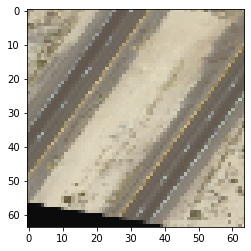

(1, 64, 64, 3)


In [ ]:
img_path = testdir + 'freeway/freeway_000099.png'

img = image.load_img(img_path, target_size=(64, 64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

print(img_tensor.shape)

In [ ]:
cat=['agricultural',
 'airplane',
 'baseballdiamond',
 'beach',
 'buildings',
 'chaparral',
 'denseresidential',
 'forest',
 'freeway',
 'golfcourse',
 'harbor',
 'intersection',
 'mediumresidential',
 'mobilehomepark',
 'overpass',
 'parkinglot',
 'river',
 'runway',
 'storagetanks',
 'tenniscourt']
print(cat)

['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'storagetanks', 'tenniscourt']


In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
predict=model.predict(images) 
classes=np.argmax(predict,axis=1)
index=classes[0]
print("Predicted class is:",cat[index])

Predicted class is: freeway
